##### QThread 多執行緒
使用 PyQt5 設計介面時，視窗主程式的本質是放在一個「無窮迴圈」裡執行，如果需要加入多個迴圈且不影響主視窗\
( 如果單純放入迴圈，會在所有迴圈結束後才啟動視窗 )，就需要使用 QThread 機制，讓多個執行緒同時執行，\
這篇教學會介紹 QThread 的使用方式，還會額外介紹搭配 Python threading 標準函式庫的作法。

##### 開始使用 QThread 
建立 PyQt5 視窗物件後，如果要執行的程式內容裡出現了「迴圈」，則因為程式碼執行的順序，必須要等待所有迴圈結束後，才會正式啟動視窗，\
例如下方的程式碼，視窗裡放入兩個 QLabel，分別使用 a 和 b 兩個函式，透過迴圈的方式設定文字內容不斷改變，\
但因為裡面用到 time.sleep 的方法主視窗就會等待所有迴圈結束後才會啟動，造成視窗出現後，QLabel 裡的文字已經固定為最終的結果\
( 如果觀察 print 的內容，也會發現 a() 執行完畢後才會執行 b() )。

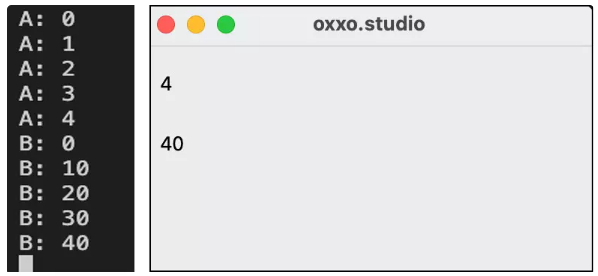

In [ ]:
from PyQt5 import QtWidgets
import sys, time

app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('oxxo.studio')
Form.resize(300, 200)

label_a = QtWidgets.QLabel(Form)      # 第一個 QLabel
label_a.setGeometry(10, 10, 100, 30)

label_b = QtWidgets.QLabel(Form)      # 第二個 QLabel
label_b.setGeometry(10, 50, 100, 30)

def a():
    for i in range(0,5):
        label_a.setText(str(i))      # 每次迴圈執行時設定文字
        print('A:',i)
        time.sleep(0.5)              # 等待 0.5 秒

def b():
    for i in range(0,50,10):
        label_b.setText(str(i))      # 每次迴圈執行時設定文字
        print('B:',i)
        time.sleep(0.5)              # 等待 0.5 秒

a()          # 執行 a()
b()          # 執行 a()

Form.show()  # 顯示主視窗
sys.exit(app.exec_())

如果要讓程式正常運作，除了使用 PyQt5 的 QTimer 定時器，也可透過 QThread 多執行緒的方式，分別將函式放入不同的執行緒中去執行，\
就能做到「非同步」的效果 ( 參考「同步與非同步」)，下方的程式碼先 import QThread 模組，接著定義出兩個 QThread 執行緒，\
再將執行緒的 run 對應到要執行的函式，執行後就會是預期的結果。

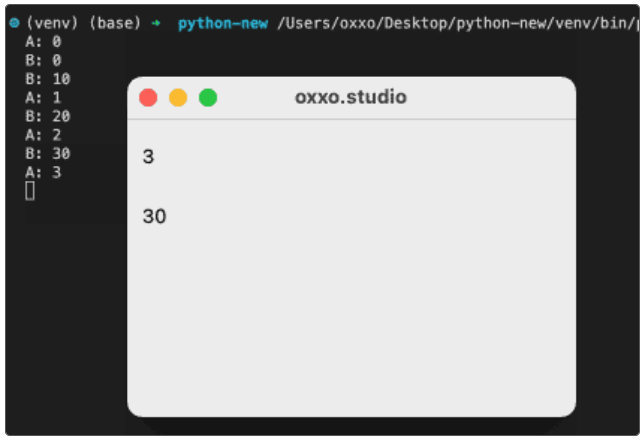

In [ ]:
from PyQt5 import QtWidgets
from PyQt5.QtCore import QThread
import sys, time

app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('oxxo.studio')
Form.resize(300, 200)

label_a = QtWidgets.QLabel(Form)
label_a.setGeometry(10, 10, 100, 30)

label_b = QtWidgets.QLabel(Form)
label_b.setGeometry(10, 50, 100, 30)

def a():
    for i in range(0,5):
        label_a.setText(str(i))
        print('A:',i)
        time.sleep(0.5)

def b():
    for i in range(0,50,10):
        label_b.setText(str(i))
        print('B:',i)
        time.sleep(0.5)

thread_a = QThread()   # 建立 Thread()
thread_a.run = a       # 設定該執行緒執行 a()
thread_a.start()       # 啟動執行緒

thread_b = QThread()   # 建立 Thread()
thread_b.run = b       # 設定該執行緒執行 b()
thread_b.start()       # 啟動執行緒

Form.show()
sys.exit(app.exec_())

##### QThread 常用方法 
下列 QThread 常用方法，可以處理執行緒的開始與等待：

|方法|參數|說明|\
|start()||啟動執行緒。|\
|wait()||等待該執行緒結束。|\
|sleep()|sec|等待該執行緒幾秒。|

舉例來說，修改上面的程式碼，在 b 函式裡加入 thread_a.wait()，b 函式的迴圈就會等到 a 函式執行完成後 ( thread_a 執行緒結束 )，才會開始動作。

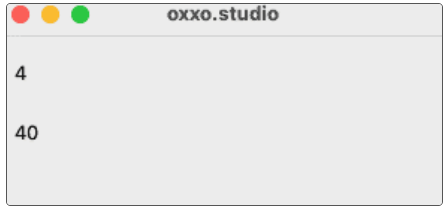

In [ ]:
from PyQt5 import QtWidgets
from PyQt5.QtCore import QThread
import sys, time

app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('oxxo.studio')
Form.resize(300, 200)

label_a = QtWidgets.QLabel(Form)
label_a.setGeometry(10, 10, 100, 30)

label_b = QtWidgets.QLabel(Form)
label_b.setGeometry(10, 50, 100, 30)

def a():
    for i in range(0,5):
        label_a.setText(str(i))
        print('A:',i)
        time.sleep(1)

def b():
    thread_a.wait()             # 使用 wait
    for i in range(0,50,10):
        label_b.setText(str(i))
        print('B:',i)
        time.sleep(1)

thread_a = QThread()   # 建立 Thread()
thread_a.run = a       # 設定該執行緒執行 a()
thread_a.start()       # 啟動執行緒

thread_b = QThread()   # 建立 Thread()
thread_b.run = b       # 設定該執行緒執行 b()
thread_b.start()       # 啟動執行緒

Form.show()
sys.exit(app.exec_())

如果將 thread_a.wait() 改成 thread_a.sleep(1)，則 b 函式的迴圈就會等到 a 函式執行一秒後，再開始動作。

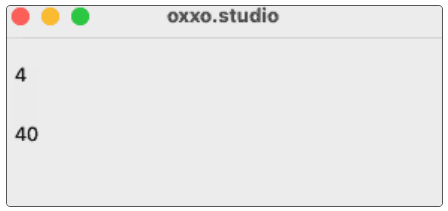

In [ ]:
from PyQt5 import QtWidgets
from PyQt5.QtCore import QThread
import sys, time

app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('oxxo.studio')
Form.resize(300, 200)

label_a = QtWidgets.QLabel(Form)
label_a.setGeometry(10, 10, 100, 30)

label_b = QtWidgets.QLabel(Form)
label_b.setGeometry(10, 50, 100, 30)

def a():
    for i in range(0,5):
        label_a.setText(str(i))
        print('A:',i)
        time.sleep(0.5)

def b():
    thread_a.sleep(5)             # 使用 sleep 等待5秒
    for i in range(0,50,10):
        label_b.setText(str(i))
        print('B:',i)
        time.sleep(0.5)

thread_a = QThread()   # 建立 Thread()
thread_a.run = a       # 設定該執行緒執行 a()
thread_a.start()       # 啟動執行緒

thread_b = QThread()   # 建立 Thread()
thread_b.run = b       # 設定該執行緒執行 b()
thread_b.start()       # 啟動執行緒

Form.show()
sys.exit(app.exec_())

##### QThread 搭配 threading Event 
搭配 threading 標準函式庫的 Event 功能 ( 需要 import threading )，透過偵測事件的方式，就能要讓不同的 QThread 之間可以互相溝通連動\
( 例如 a 執行到發生某件事，再讓 b 開始動作 )，下方的程式碼執行後，會在 b 函式進行數字大於 20 的時候觸發事件，這時 a 函式收到事件被觸發的訊息，\
就會開始動作。

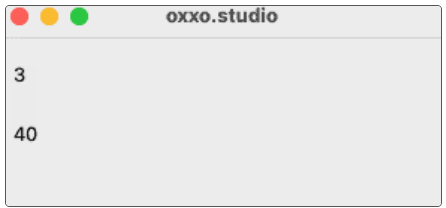

In [ ]:
from PyQt5 import QtWidgets
from PyQt5.QtCore import QThread
import sys, time, threading

app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('oxxo.studio')
Form.resize(300, 200)

label_a = QtWidgets.QLabel(Form)
label_a.setGeometry(10, 10, 100, 30)

label_b = QtWidgets.QLabel(Form)
label_b.setGeometry(10, 50, 100, 30)

event = threading.Event()    # 建立事件

def a():
    event.wait()             # 等待事件被觸發
    for i in range(0,5):
        label_a.setText(str(i))
        print('A:',i)
        time.sleep(1)

def b():
    for i in range(0,80,10):
        if i>=50:
            event.set()      # 觸發事件
        label_b.setText(str(i))
        print('B:',i)
        time.sleep(1)

thread_a = QThread()
thread_a.run = a
thread_a.start()

thread_b = QThread()
thread_b.run = b
thread_b.start()

Form.show()
sys.exit(app.exec_())

上方的程式碼也可以改成用 class 的寫法：

In [ ]:
# 導入所需的 PyQt5 模組和其他必需的標準庫模組。
from PyQt5 import QtWidgets
from PyQt5.QtCore import QThread
import sys, time, threading

# 定義一個類 MyWidget，繼承自 QtWidgets.QWidget，用於建立窗口。
class MyWidget(QtWidgets.QWidget):
    # 初始化函數，配置窗口並初始化變量。
    def __init__(self):
        # 調用父類的初始化函數。
        super().__init__()
        # 設置窗口標題。
        self.setWindowTitle('oxxo.studio')
        # 設置窗口大小。
        self.resize(300, 200)
        # 創建一個 threading.Event 對象，用於線程間同步。
        self.event = threading.Event()
        # 調用 ui 方法來設置界面元件。
        self.ui()
        # 啟動多線程處理。
        self.run()

    # 定義 ui 方法，用於創建和放置標籤。
    def ui(self):
        # 創建兩個 QLabel 對象用於顯示數據。
        self.label_a = QtWidgets.QLabel(self)
        self.label_a.setGeometry(10, 10, 100, 30)

        self.label_b = QtWidgets.QLabel(self)
        self.label_b.setGeometry(10, 50, 100, 30)

    # 定義 a 方法，將在一個線程中執行。
    def a(self):
        # 等待事件被觸發。
        self.event.wait()
        for i in range(0, 5):
            # 更新標籤文本（這裡存在問題：應該在主線程中更新 GUI）。
            self.label_a.setText(str(i))
            print('A:', i)
            time.sleep(0.5)

    # 定義 b 方法，將在另一個線程中執行。
    def b(self):
        for i in range(0, 50, 10):
            if i > 20:
                # 當 i 大於 20 時觸發事件。
                self.event.set()
            # 更新標籤文本（同上，存在問題）。
            self.label_b.setText(str(i))
            print('B:', i)
            time.sleep(0.5)

    # 定義 run 方法，用於啟動線程。
    def run(self):
        # 創建兩個 QThread 對象。
        self.thread_a = QThread()
        self.thread_a.run = self.a  # 應該使用 QThread 提供的方法來處理，這裡可能不會正常工作。
        self.thread_a.start()

        self.thread_b = QThread()
        self.thread_b.run = self.b  # 同上。
        self.thread_b.start()

# 主程序入口。
if __name__ == '__main__':
    app = QtWidgets.QApplication(sys.argv)
    Form = MyWidget()
    Form.show()
    sys.exit(app.exec_())

##### 使用 threading + PyQt5 
除了使用 PyQt5 內建的 QThread，也可以單純使用 Python 標準函式庫 threading 來處理多執行緒 ( 參考「threading 多執行緒處理」 )，\
下方的程式碼使用 threading 的方式，執行後會產生跟使用 QThread 同樣的效果。

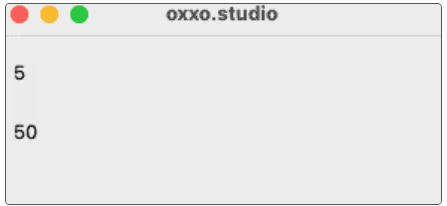

In [ ]:
from PyQt5 import QtWidgets
from PyQt5.QtCore import QThread
import sys, time, threading

app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('oxxo.studio')
Form.resize(300, 200)

label_a = QtWidgets.QLabel(Form)
label_a.setGeometry(10, 10, 100, 30)

label_b = QtWidgets.QLabel(Form)
label_b.setGeometry(10, 50, 100, 30)

def a():
    for i in range(1,6):
        label_a.setText(str(i))
        print('A:',i)
        time.sleep(0.5)

def b():
    for i in range(10,60,10):
        label_b.setText(str(i))
        print('B:',i)
        time.sleep(0.5)

thread_a = threading.Thread(target=a)   # 建立執行緒，執行 a 函式
thread_b = threading.Thread(target=b)   # 建立執行緒，執行 b 函式

thread_a.start()   # 啟動執行緒
thread_b.start()   # 啟動執行緒

Form.show()
sys.exit(app.exec_())